In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px #plotly express
import seaborn as sns

<center><h3>1-Reading Data<h3><center>

In [2]:
path = 'datasets/'
train = pd.read_csv(path + 'train.csv.zip')
#test = pd.read_csv(path + 'test.csv.zip')

In [3]:
# (total_data_points i.e. rows , columns number)
print(train.shape)

#print(test.shape)

(404290, 6)


We have `404290` data points to train on

In [4]:
train.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
205224,205224,308309,308310,Is cgi using c++/python better than php?,Is there a key benefit of programming an Enter...,0
41999,41999,75086,75743,Why I shouldn't visit your country?,What should I absolutely not do when visiting ...,0
304186,304186,427402,427403,What are the daily tasks of a security expert?,How do I add efficiency to daily life tasks?,0
103232,103232,170671,109087,Why Do Olympians Bite Their Medals?,Why do athletes bite their medals?,1
7063,7063,13813,13814,What did you learn from playing video games?,What can we learn from video games?,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


`Observation:` <br>
Data fields above consisting of:
* `id`: looks a simple rowID
* `qid{1 or 2}`: unique ID of each question in pair
* `question{1 or 2}`: actual textual contents of questions
* `is_duplicate`: label that we will trying to predict - whether two questions are duplicates of each other(1) or not(0)

In [6]:
#nan check
train.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
#nan exist here
train[train.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [8]:
#replacing nan with empty string
train.fillna('',inplace=True)

In [9]:
#nan check
train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

<center><h3>2-Distribution of data points among Output Classes</h3></center>

Number of `Duplicate(Similar)` and `non-duplicate(non similar)` questions

Class Distribution %tg: 
0    0.630802
1    0.369198
Name: is_duplicate, dtype: float64



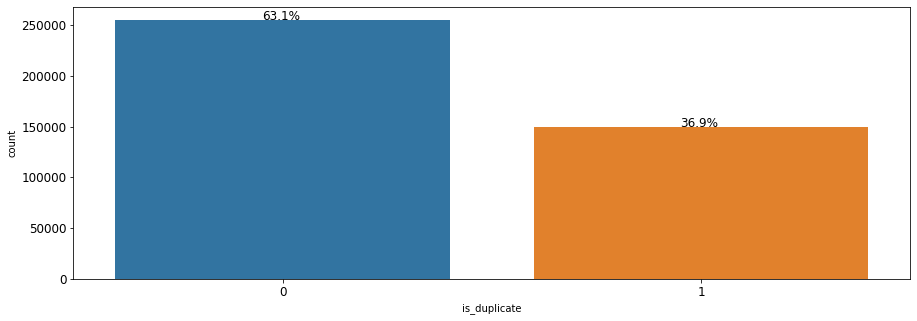

In [10]:
#function to plot class distribution percentage and save it in output_img file
def plot_bar(plot, feature):
    print(f'Class Distribution %tg: \n{train.is_duplicate.value_counts(normalize=True)}\n')
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage,(x,y),size=12)
    plt.savefig('output_img/1-class_distribution.png')
    plt.show()

plt.figure(figsize=(15,5))
ax = sns.countplot('is_duplicate',data=train) #use of above function
plt.xticks(size=12)
plt.yticks(size=12)
plot_bar(ax,train.is_duplicate)

`Observation:`<br>
* No of question pairs with `is_duplicate=0`: 63.1%
* No of question pairs with `is_duplicate=1`: 36.9%

<center><h3>3-Number of unique Questions</h3></center>



In [11]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [12]:
all_qids = pd.Series(train['qid1'].to_list() + train['qid2'].to_list())
unique_qs = len(np.unique(all_qids))
qs_morethan_onetime = np.sum(all_qids.value_counts() > 1)

print(f"Total number of unique questions ==> {len(set(train['qid1'].to_list() + train['qid2'].to_list()))}\n")
print (f'Number of unique questions that appear more than one time ==> {qs_morethan_onetime} ({qs_morethan_onetime/unique_qs*100:.2f}%)\n')
print(f'Maximum number of times a single question is repeated ==> {max(all_qids.value_counts())}')


Total number of unique questions ==> 537933

Number of unique questions that appear more than one time ==> 111780 (20.78%)

Maximum number of times a single question is repeated ==> 157


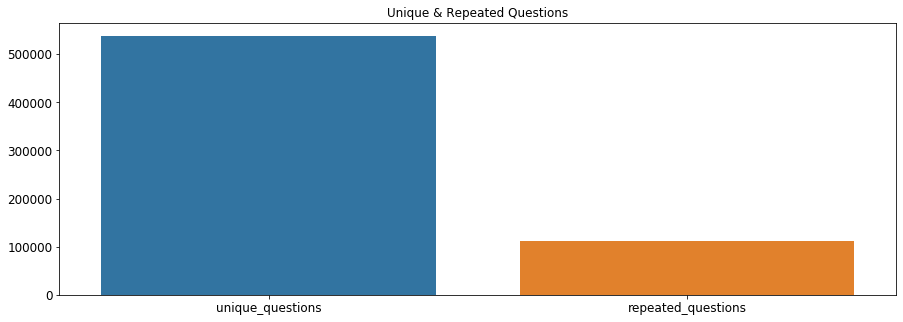

In [13]:
label = ['unique_questions', 'repeated_questions']
both_count =  [unique_qs, qs_morethan_onetime]

plt.figure(figsize=(15,5))
plt.title ('Unique & Repeated Questions')
sns.barplot(label,both_count)
plt.xticks(size=12)
plt.yticks(size=12)
plt.savefig('output_img/2-unique&repeated_questions.png')
plt.show()


<center><h3>4-Duplicate Check</h3></center>



In [14]:
duplicate_rows = train[train.duplicated()]
duplicate_rows

,id,qid1,qid2,question1,question2,is_duplicate


No duplicated found

In [15]:
#another way
duplicates = train[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print(f'Number of duplicate questions ==> {(duplicates).shape[0] - train.shape[0]}')

Number of duplicate questions ==> 0


<center><h3>5-Occurrences of each question</h3></center>

Number of times single question is repeated: 157



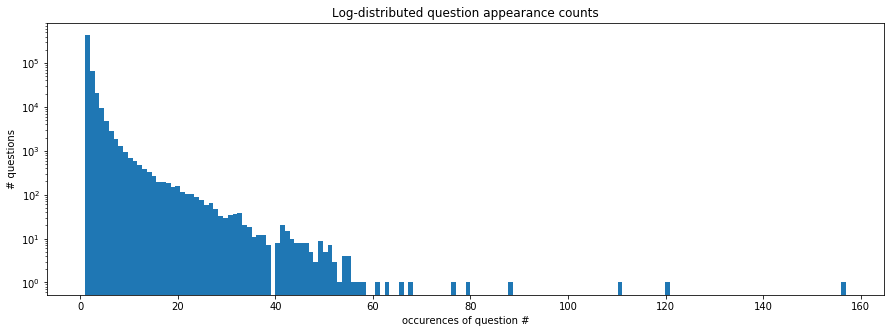

In [16]:
print (f'Number of times single question is repeated: {max(all_qids.value_counts())}\n')

plt.figure(figsize=(15,5))
plt.hist(all_qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')
plt.title('Log-distributed question appearance counts')
plt.xlabel('occurences of question #')
plt.ylabel('# questions')
plt.savefig('output_img/3-question_occurence_count.png')
plt.show()

<center><h3>6-Feature Extraction</h3></center>

Will make few more features named as:
* `freq_qid1` ==> frequency of qid1's
* `freq_qid2` ==> frequency of qid2's
* `q1_len` ==> length of q1
* `q2_len` ==> length of q2
* `num_words_q1` ==> number of words in Question 1
* `num_words_q2` ==> number of words in Question 2

--

* `common_word_q12` ==> number of common unique words in Question 1 and Question 2)
* `total_word_q12` ==> (total num of words in Question 1 + Total num of words in Question 2)
* `shared_words_q12` ==> `(common_word_q12)/(total_word_q12)`
* `freq_q1+freq_q2` ==> frequency sum of qid1 and qid2
* `freq_q1-freq_q2` ==> frequency absolute difference of qid1 and qid2

[Understand Transform](https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/)

In [17]:
#creating 6 features names as freq_qid1, freq_qid2, q1_len, q2_len, num_words_q1, num_words_q2
train['freq_qid1'] = train.groupby('qid1')['qid1'].transform('count') 
train['freq_qid2'] = train.groupby('qid2')['qid2'].transform('count')

train['q1_len'] = train['question1'].str.len() 
train['q2_len'] = train['question2'].str.len()

#will not count space
train['num_words_q1'] = train['question1'].apply(lambda row: len(row.split(" ")))
train['num_words_q2'] = train['question2'].apply(lambda row: len(row.split(" ")))

In [24]:
#dataset after feature extraction
train.sample(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,num_words_q1,num_words_q2
147249,147249,81578,71518,How much does youtube pay per 1000 views?,How much money can I make from a YouTube video...,0,8,4,41,64,8,13
16927,16927,32223,32224,"In Forex, what is the relationship between ECN...",Can I sell data on Bloomberg?,0,2,1,72,29,11,6


[Understand Map](https://www.w3schools.com/python/ref_func_map.asp)

In [41]:
#functions to create 3 more features names as common_word_q12, total_word_q12, shared_words_q12

def common_word_q12_normalized(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)


def total_word_q12_normalized(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))


def shared_words_q12_normalized(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

In [42]:
#using above 3 functions
train['common_word_q12'] = train.apply(common_word_q12_normalized,axis=1) 
train['total_word_q12'] = train.apply(total_word_q12_normalized,axis=1) 
train['shared_words_q12'] = train.apply(shared_words_q12_normalized,axis=1) 

In [43]:
train.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,num_words_q1,num_words_q2,common_word_q12,total_word_q12,shared_words_q12
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667


[Understand ABS]()

In [44]:
#creating 2 more features named as freq_q1+q2, freq_q1-q2
train['freq_q1+q2'] = train['freq_qid1'] + train['freq_qid2']
train['freq_q1-q2'] = abs(train['freq_qid1'] - train['freq_qid2'])

In [47]:
train.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,num_words_q1,num_words_q2,common_word_q12,total_word_q12,shared_words_q12,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000,5,3


#### Extracting a csv file of these features

In [49]:
train.to_csv('datasets/train_extracted_features.csv',index=False)

<center><h3>7-Extracted Features Quick Analysis</h3></center>



In [50]:
train.describe()

,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,num_words_q1,num_words_q2,common_word_q12,total_word_q12,shared_words_q12,freq_q1+q2,freq_q1-q2
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198,2.827609,3.046961,59.536709,60.108365,10.944592,11.185120,4.511610,21.126112,0.223362,5.874570,1.845715
std,116708.614503,157751.700002,159903.182629,0.482588,4.487418,6.026871,29.940655,33.863870,5.431949,6.311076,3.098656,8.592622,0.128336,9.091068,5.187882
min,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000,1.000000,1.000000,39.000000,39.000000,7.000000,7.000000,2.000000,15.000000,0.125000,2.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000,1.000000,1.000000,52.000000,51.000000,10.000000,10.000000,4.000000,19.000000,0.217391,3.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000,3.000000,2.000000,72.000000,72.000000,13.000000,13.000000,6.000000,25.000000,0.318182,5.000000,2.000000
max,404289.000000,537932.000000,537933.000000,1.000000,50.000000,120.000000,623.000000,1169.000000,125.000000,237.000000,41.000000,166.000000,0.500000,157.000000,119.000000


`Observation:`<br>
It seams some questions have only one single word in them


In [57]:
print (f'Sentence min len in question1 column ==> {min(train.num_words_q1)}')
print (f'Sentence min len in question2 column ==> {min(train.num_words_q2)}')
print (f'Number of Questions with minimum length [question1 column] ==> {train[train.num_words_q1 == 1].shape[0]}')
print (f'Number of Questions with minimum length [question2 column] ==> {train[train.num_words_q2 == 1].shape[0]}')

Sentence min len in question1 column ==> 1
Sentence min len in question2 column ==> 1
Number of Questions with minimum length [question1 column] ==> 67
Number of Questions with minimum length [question2 column] ==> 24


####  Feature: `shared_words_q12` 

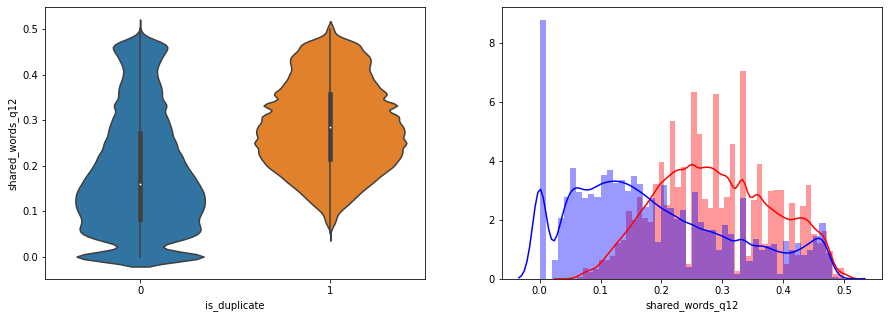

In [62]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.violinplot(x='is_duplicate', y='shared_words_q12', data=train[0:])

plt.subplot(1,2,2)
sns.distplot(train[train['is_duplicate'] == 1.0]['shared_words_q12'][0:] , label = "1", color = 'red')
sns.distplot(train[train['is_duplicate'] == 0.0]['shared_words_q12'][0:] , label = "0" , color = 'blue' )
plt.savefig('output_img/feature-shared_words_q12_plot.png')
plt.show()

`Observation:`<br>
1. Distributions for `normalized shared_words_q12` have some overlap on right side
    * It means there are ton of questions with high word similarity
2. Average word share and Common number of words of `qid1 and qid2` is more when they are duplicate(Similar)


####  Feature: `common_word_q12` 

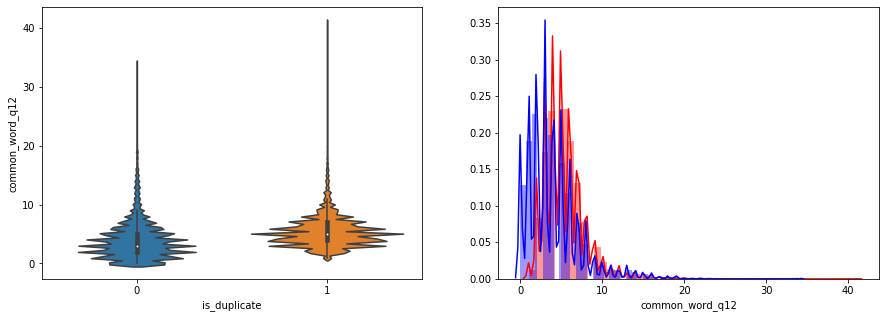

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.violinplot(x='is_duplicate', y='common_word_q12', data=train[0:])

plt.subplot(1,2,2)
sns.distplot(train[train['is_duplicate'] == 1.0]['common_word_q12'][0:] , label = "1", color = 'red')
sns.distplot(train[train['is_duplicate'] == 0.0]['common_word_q12'][0:] , label = "0" , color = 'blue' )
plt.savefig('output_img/feature-common_word_q12.png')
plt.show()

`Observation:`<br>
Distributions of feature `common_word_q12` in similar and non-similar questions is highly overlapping

We have done basic level data analysis, it is bare minimum required analysis<br>
Now in next notebook I will do some bare minimum `Advanced Analysis`